# The main goal is to display the prediction Day,Week and Month for each

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df = pd.read_csv("predictions - PredictionTable.csv",parse_dates= ["createdAt (S)"])

In [3]:
df.head(10)

,id (S),createdAt (S),currentPrice (N),predictedPrice (N),symbol (S)
0,01f41efc-9d8a-41a1-a2a0-9ee4b8f729b9,2020-06-10 18:18:30.348000+00:00,1465.870,1468.3500,GOOG
1,04631b80-bdfb-41c2-b789-cdc44d21fbdc,2020-06-02 18:35:29.776000+00:00,892.420,898.6075,TSLA
2,05ba66bf-1fbf-43a9-ad2d-1d2771205c43,2020-06-18 15:15:29.941000+00:00,1007.265,1014.8175,TSLA
3,0859af6f-f8bc-422e-a590-1e3a0f0be7c1,2020-06-05 19:14:30.920000+00:00,44.540,44.7850,XLE
4,0a9a7ef4-ff50-4f65-8414-8d294800abc2,2020-07-07 16:07:30.139000+00:00,376.830,377.6900,AAPL
5,0d3889fb-416f-45be-81da-629971af677b,2020-07-08 17:33:29.881000+00:00,1498.170,1500.1650,GOOG
6,0db7d474-3edf-458d-bafa-98bcae7aae62,2020-06-15 15:46:30.860000+00:00,420.625,422.2000,NFLX
7,0e9b0088-1f09-4eb0-a2e4-e21a3ef92bbf,2020-07-07 17:04:30.555000+00:00,376.785,377.6450,AAPL
8,0f023409-be7e-427b-8841-0f665273ab58,2020-06-01 18:58:31.202000+00:00,1428.660,1430.3725,GOOG
9,10e71217-e6a5-4ee2-a78a-789561fbb40f,2020-06-11 15:32:30.660000+00:00,1442.330,1444.3825,GOOG


In [4]:
# display the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id (S)              200 non-null    object             
 1   createdAt (S)       200 non-null    datetime64[ns, UTC]
 2   currentPrice (N)    200 non-null    float64            
 3   predictedPrice (N)  200 non-null    float64            
 4   symbol (S)          200 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 6.3+ KB


In [5]:
# Drop the column name is ID(S)
df.drop("id (S)", axis = 1, inplace = True)
df.head()

,createdAt (S),currentPrice (N),predictedPrice (N),symbol (S)
0,2020-06-10 18:18:30.348000+00:00,1465.870,1468.3500,GOOG
1,2020-06-02 18:35:29.776000+00:00,892.420,898.6075,TSLA
2,2020-06-18 15:15:29.941000+00:00,1007.265,1014.8175,TSLA
3,2020-06-05 19:14:30.920000+00:00,44.540,44.7850,XLE
4,2020-07-07 16:07:30.139000+00:00,376.830,377.6900,AAPL


In [6]:
# Get Day Week and Month in date column
df['Day'] = df['createdAt (S)'].dt.day
df['Week'] = df['createdAt (S)'].dt.weekday
df['Month'] = df['createdAt (S)'].dt.month

In [7]:
df.head()

,createdAt (S),currentPrice (N),predictedPrice (N),symbol (S),Day,Week,Month
0,2020-06-10 18:18:30.348000+00:00,1465.870,1468.3500,GOOG,10,2,6
1,2020-06-02 18:35:29.776000+00:00,892.420,898.6075,TSLA,2,1,6
2,2020-06-18 15:15:29.941000+00:00,1007.265,1014.8175,TSLA,18,3,6
3,2020-06-05 19:14:30.920000+00:00,44.540,44.7850,XLE,5,4,6
4,2020-07-07 16:07:30.139000+00:00,376.830,377.6900,AAPL,7,1,7


In [8]:
df["date"] = pd.to_datetime(df["createdAt (S)"])

In [9]:
# Display the Minmum and Maximum date in createdAt(S) cloumn 
import datetime 
import pytz
#refactor timezones
def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')

  return x.astimezone(est)

In [10]:
df['date'] = df['date'].apply(lambda x: refactor_timezone(x))
df['dayofweek'] = df['date'].apply(lambda x: x.day_name())
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)
print(df.date.min().strftime('%a, %d %b %Y %I:%M %p'))
print(df.date.max().strftime('%a, %d %b %Y %I:%M %p'))
df["createdAt (S)"] = df.date.dt.strftime("%Y-%m-%d %H:%M:%S")
df["date"] = df.date.dt.strftime("%Y-%m-%d %H:%M:%S")

Thu, 21 May 2020 07:24 AM
Thu, 09 Jul 2020 03:37 PM


In [11]:
df.head()

,createdAt (S),currentPrice (N),predictedPrice (N),symbol (S),Day,Week,Month,date,dayofweek
0,2020-06-10 14:18:30,1465.870,1468.3500,GOOG,10,2,6,2020-06-10 14:18:30,Wednesday
1,2020-06-02 14:35:29,892.420,898.6075,TSLA,2,1,6,2020-06-02 14:35:29,Tuesday
2,2020-06-18 11:15:29,1007.265,1014.8175,TSLA,18,3,6,2020-06-18 11:15:29,Thursday
3,2020-06-05 15:14:30,44.540,44.7850,XLE,5,4,6,2020-06-05 15:14:30,Friday
4,2020-07-07 12:07:30,376.830,377.6900,AAPL,7,1,7,2020-07-07 12:07:30,Tuesday


In [12]:
# Describe the data
df.describe()

,currentPrice (N),predictedPrice (N),Day,Week,Month
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,623.414850,625.411097,11.590000,1.955000,6.350000
std,495.237725,496.409653,8.979144,1.122173,0.647764
min,37.500000,37.630000,1.000000,0.000000,5.000000
25%,211.547500,212.157500,6.500000,1.000000,6.000000
50%,379.247500,379.972500,8.000000,2.000000,6.000000
75%,1001.852500,1009.405000,18.000000,3.000000,7.000000
max,1507.145000,1509.232500,30.000000,4.000000,7.000000


In [13]:
print("The mean value in predictedPrice (N) ",df['predictedPrice (N)'].mean()) #For average value
print("The Maximum value in predictedPrice (N) ",df['predictedPrice (N)'].max()) #For maximum value
print("The Minmumn value in predictedPrice (N) ",df['predictedPrice (N)'].min()) #For minimum value
print("The Medain value in predictedPrice (N) ",df['predictedPrice (N)'].median()) #For minimum value

The mean value in predictedPrice (N)  625.4110975
The Maximum value in predictedPrice (N)  1509.2325
The Minmumn value in predictedPrice (N)  37.63
The Medain value in predictedPrice (N)  379.97249999999997


In [14]:
# Describe the data for whole datasets
df.describe(include = "all")

,createdAt (S),currentPrice (N),predictedPrice (N),symbol (S),Day,Week,Month,date,dayofweek
count,200,200.000000,200.000000,200,200.000000,200.000000,200.000000,200,200
unique,193,NaN,NaN,6,NaN,NaN,NaN,193,5
top,2020-07-07 14:18:30,NaN,NaN,AAPL,NaN,NaN,NaN,2020-07-07 14:18:30,Tuesday
freq,2,NaN,NaN,42,NaN,NaN,NaN,2,63
mean,NaN,623.414850,625.411097,NaN,11.590000,1.955000,6.350000,NaN,NaN
std,NaN,495.237725,496.409653,NaN,8.979144,1.122173,0.647764,NaN,NaN
min,NaN,37.500000,37.630000,NaN,1.000000,0.000000,5.000000,NaN,NaN
25%,NaN,211.547500,212.157500,NaN,6.500000,1.000000,6.000000,NaN,NaN
50%,NaN,379.247500,379.972500,NaN,8.000000,2.000000,6.000000,NaN,NaN
75%,NaN,1001.852500,1009.405000,NaN,18.000000,3.000000,7.000000,NaN,NaN


# Data Visualization

In [15]:
df["symbol (S)"].value_counts()

AAPL    42
MSFT    42
GOOG    40
TSLA    31
NFLX    26
XLE     19
Name: symbol (S), dtype: int64

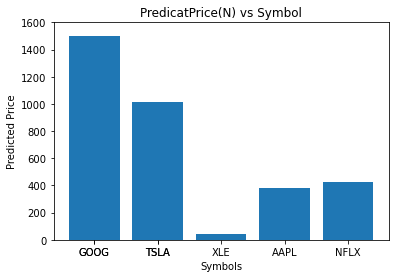

In [16]:
plt.bar(df["symbol (S)"].head(7),df["predictedPrice (N)"].head(7))
plt.ylim(0,1600)
plt.xticks(df["symbol (S)"].head(7))
plt.title("PredicatPrice(N) vs Symbol")
plt.xlabel("Symbols")
plt.ylabel("Predicted Price")
plt.show()

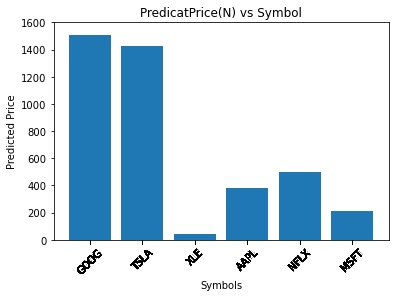

In [17]:
plt.bar(df["symbol (S)"],df["predictedPrice (N)"])
plt.ylim(0,1600)
plt.xticks(df["symbol (S)"])
plt.xticks(rotation=45)
plt.title("PredicatPrice(N) vs Symbol")
plt.xlabel("Symbols")
plt.ylabel("Predicted Price")
plt.show()

### Day wise prediction

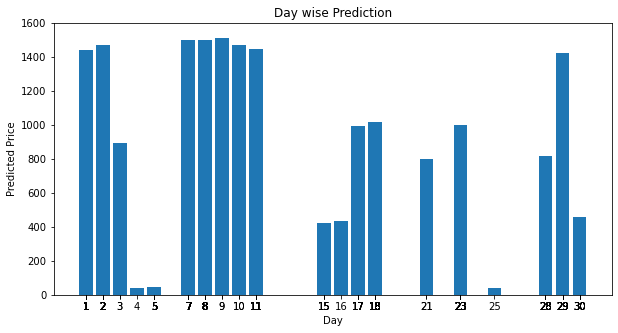

In [18]:
plt.figure(figsize=(10,5))
plt.bar(df["Day"],df["predictedPrice (N)"], )
plt.ylim(0,1600)
plt.xticks(df["Day"])
plt.title("Day wise Prediction")
plt.xlabel("Day")
plt.ylabel("Predicted Price")
plt.show()

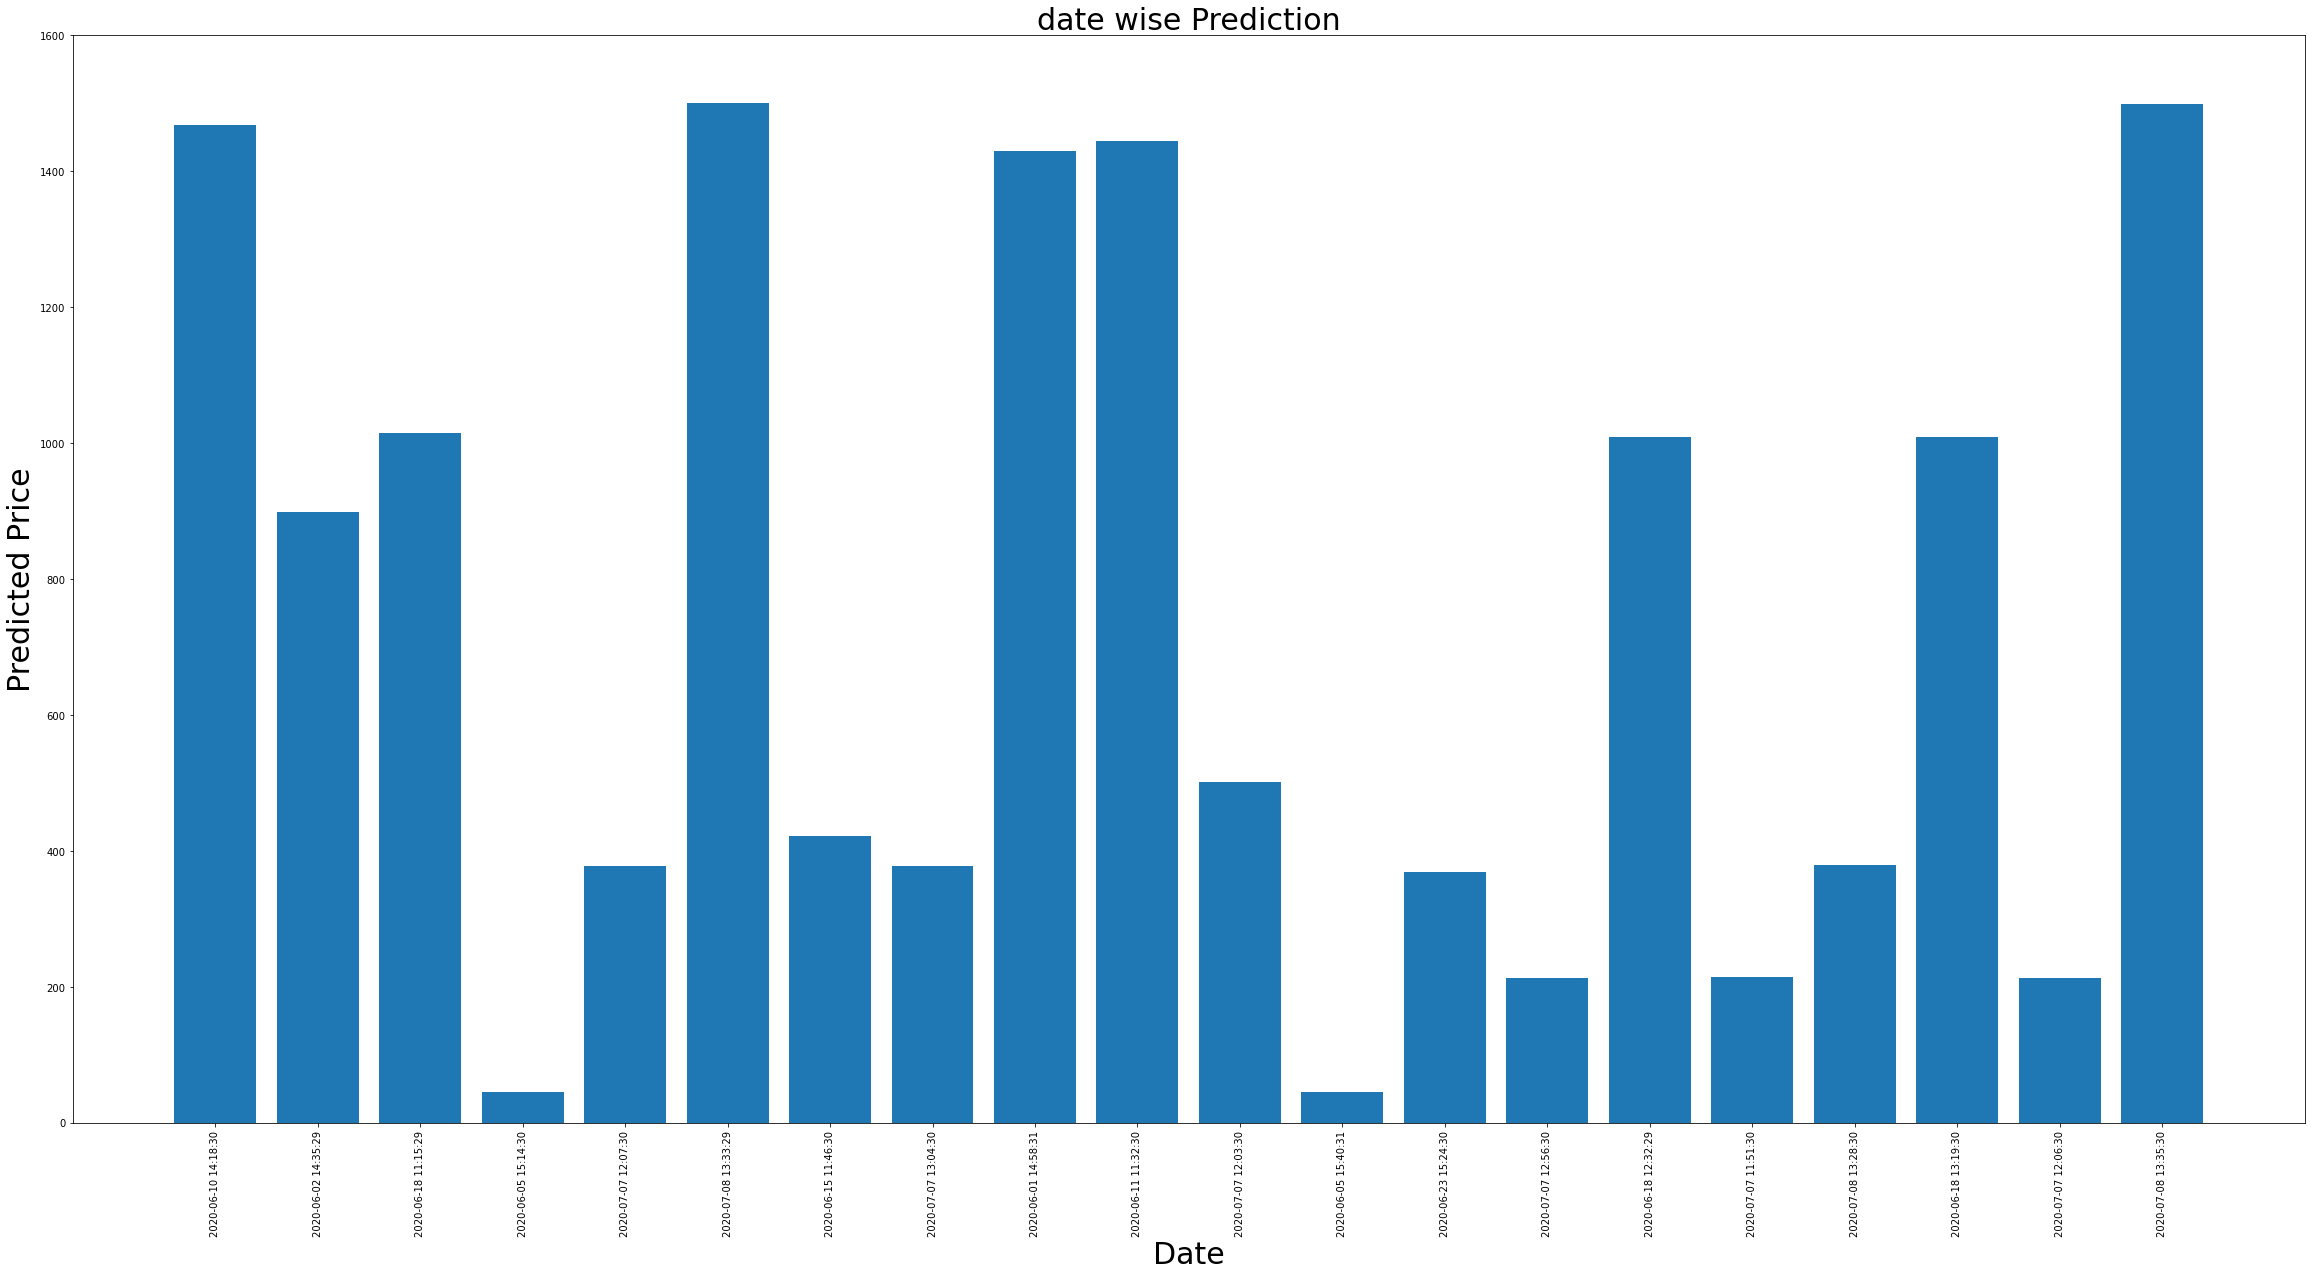

In [44]:
plt.figure(figsize=(40,20))
plt.bar(df["date"].head(20),df["predictedPrice (N)"].head(20))
plt.ylim(0,1600)
plt.xticks(df["date"].head(20))
plt.xticks(rotation=90)
plt.title("date wise Prediction",fontsize = 30)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Predicted Price",fontsize = 30)
plt.show()

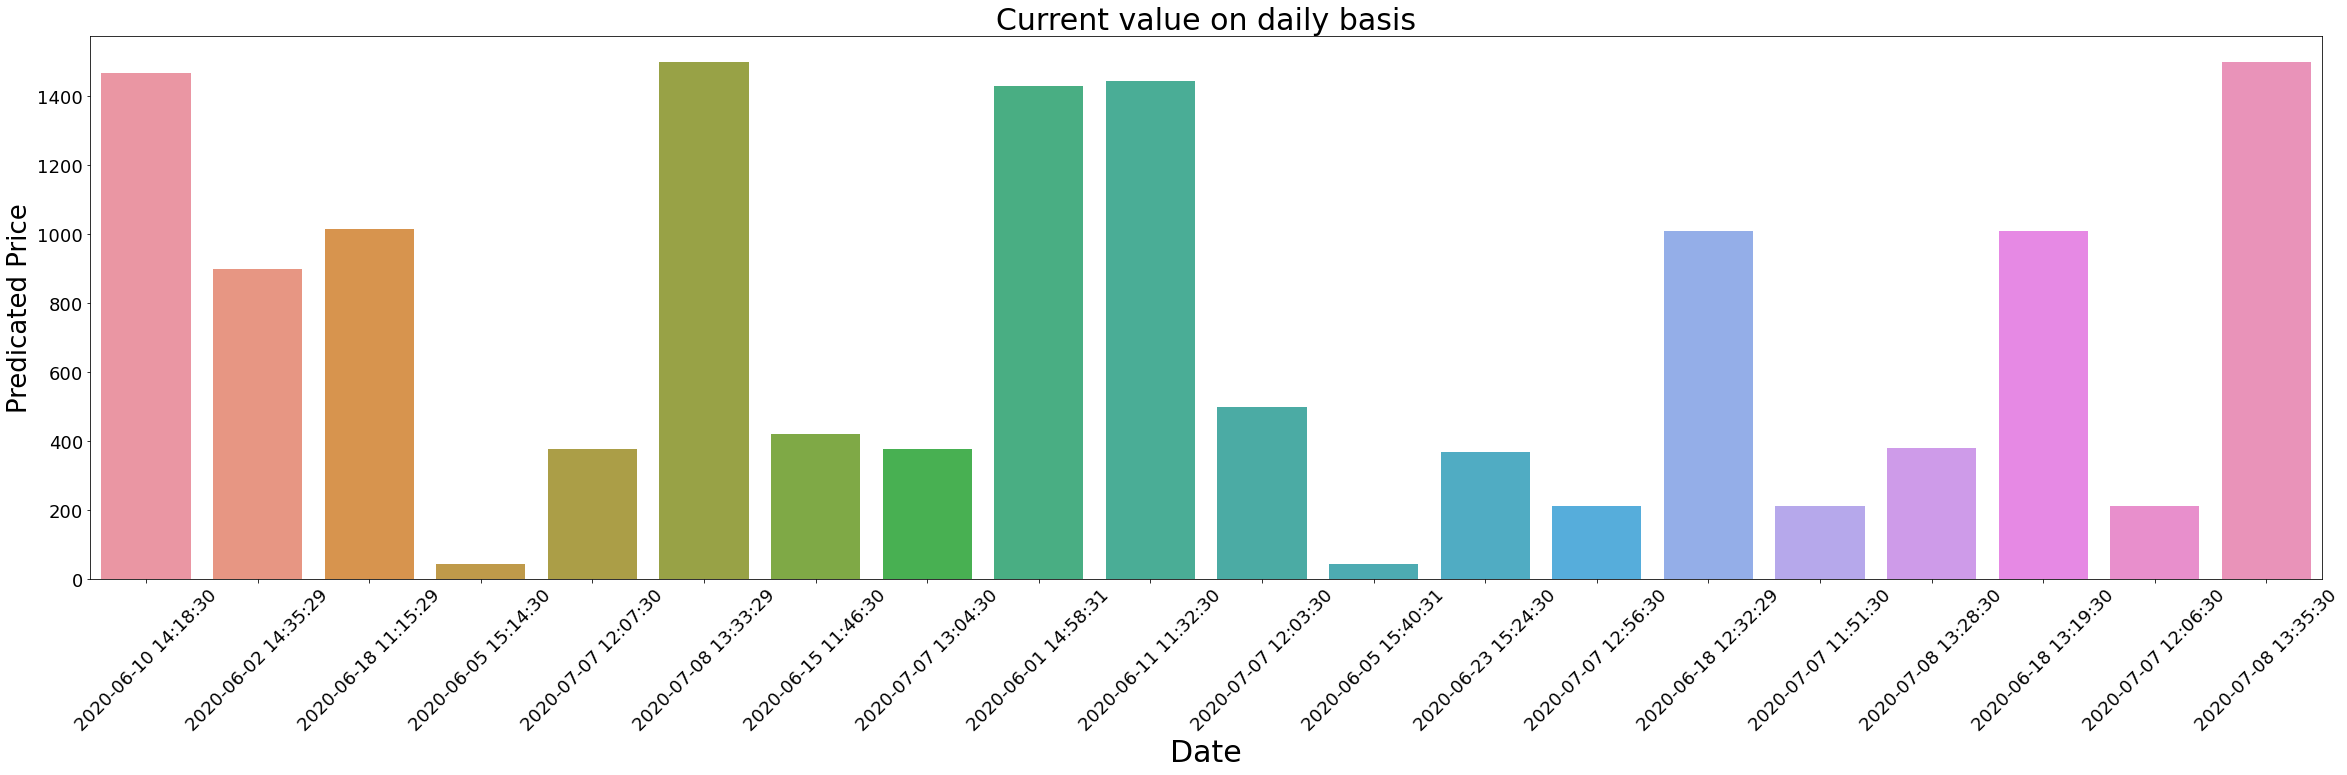

In [45]:
plt.figure(figsize=(40,10))
sns.barplot(df["date"].head(20),df["predictedPrice (N)"])
plt.xticks(rotation=45)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Predicated Price",fontsize = 26)
plt.title("Current value on daily basis",fontsize=30)
plt.tick_params(labelsize=18)

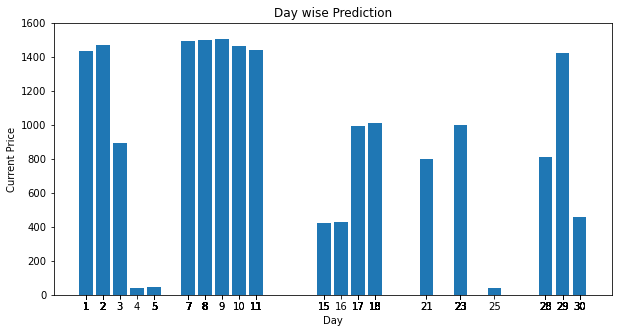

In [19]:
plt.figure(figsize=(10,5))
plt.bar(df["Day"],df["currentPrice (N)"], )
plt.ylim(0,1600)
plt.xticks(df["Day"])
plt.title("Day wise Prediction")
plt.xlabel("Day")
plt.ylabel("Current Price")
plt.show()

### Week wise prediction

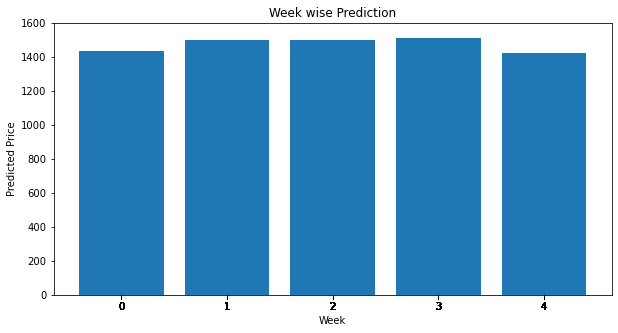

In [20]:
plt.figure(figsize=(10,5))
plt.bar(df["Week"],df["predictedPrice (N)"], )
plt.ylim(0,1600)
# plt.xlim(1,7)
plt.xticks(df["Week"])
plt.title("Week wise Prediction")
plt.xlabel("Week")
plt.ylabel("Predicted Price")
plt.show()

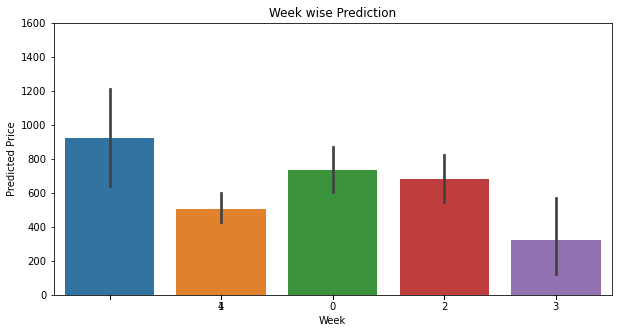

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(df["Week"],df["predictedPrice (N)"], )
plt.ylim(0,1600)
# plt.xlim(1,7)
plt.xticks(df["Week"])
# plt.xticks(rotation=90)
plt.title("Week wise Prediction")
plt.xlabel("Week")
plt.ylabel("Predicted Price")
plt.show()

### Month wise prediction

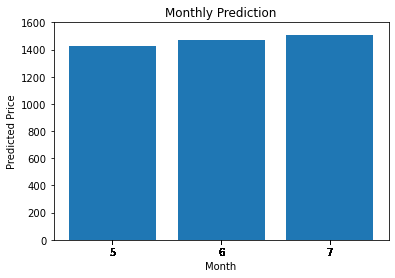

In [22]:
# plt.figure(figsize=(10,5))
plt.bar(df["Month"],df["predictedPrice (N)"])
plt.ylim(0,1600)
# plt.xlim(1,7)
plt.xticks(df["Month"])
plt.title("Monthly Prediction")
plt.xlabel("Month")
plt.ylabel("Predicted Price")
plt.show()

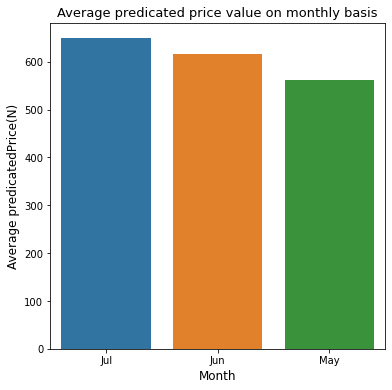

In [23]:
import calendar
df["month"] = pd.DatetimeIndex(df["date"]).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df_mon = df.groupby(["month"]).mean()
df_mon = df_mon.reset_index()
plt.figure(figsize = (6,6))
sns.barplot(df_mon["month"],df_mon["predictedPrice (N)"])
plt.xlabel("Month",fontsize=12)
plt.ylabel("Average predicatedPrice(N)",fontsize = 12)
plt.title("Average predicated price value on monthly basis",fontsize=13)
plt.tick_params(labelsize=10)

In [24]:
df["Month"].unique()

array([6, 7, 5], dtype=int64)

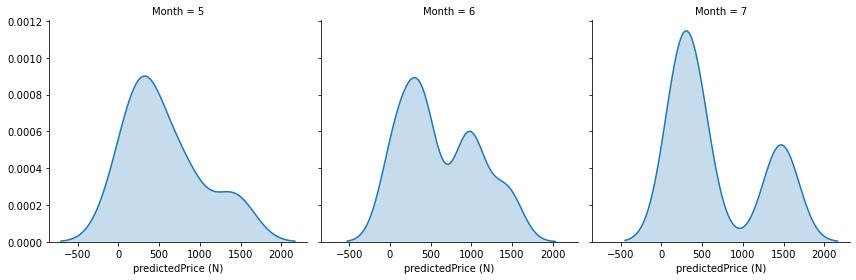

In [60]:
g = sns.FacetGrid(df, col ="Month" ,height = 4 )
g.map(sns.kdeplot, "predictedPrice (N)", shade = True)
# plt.xlim(0,2500)
plt.show()

In [ ]:
# Extra visualization

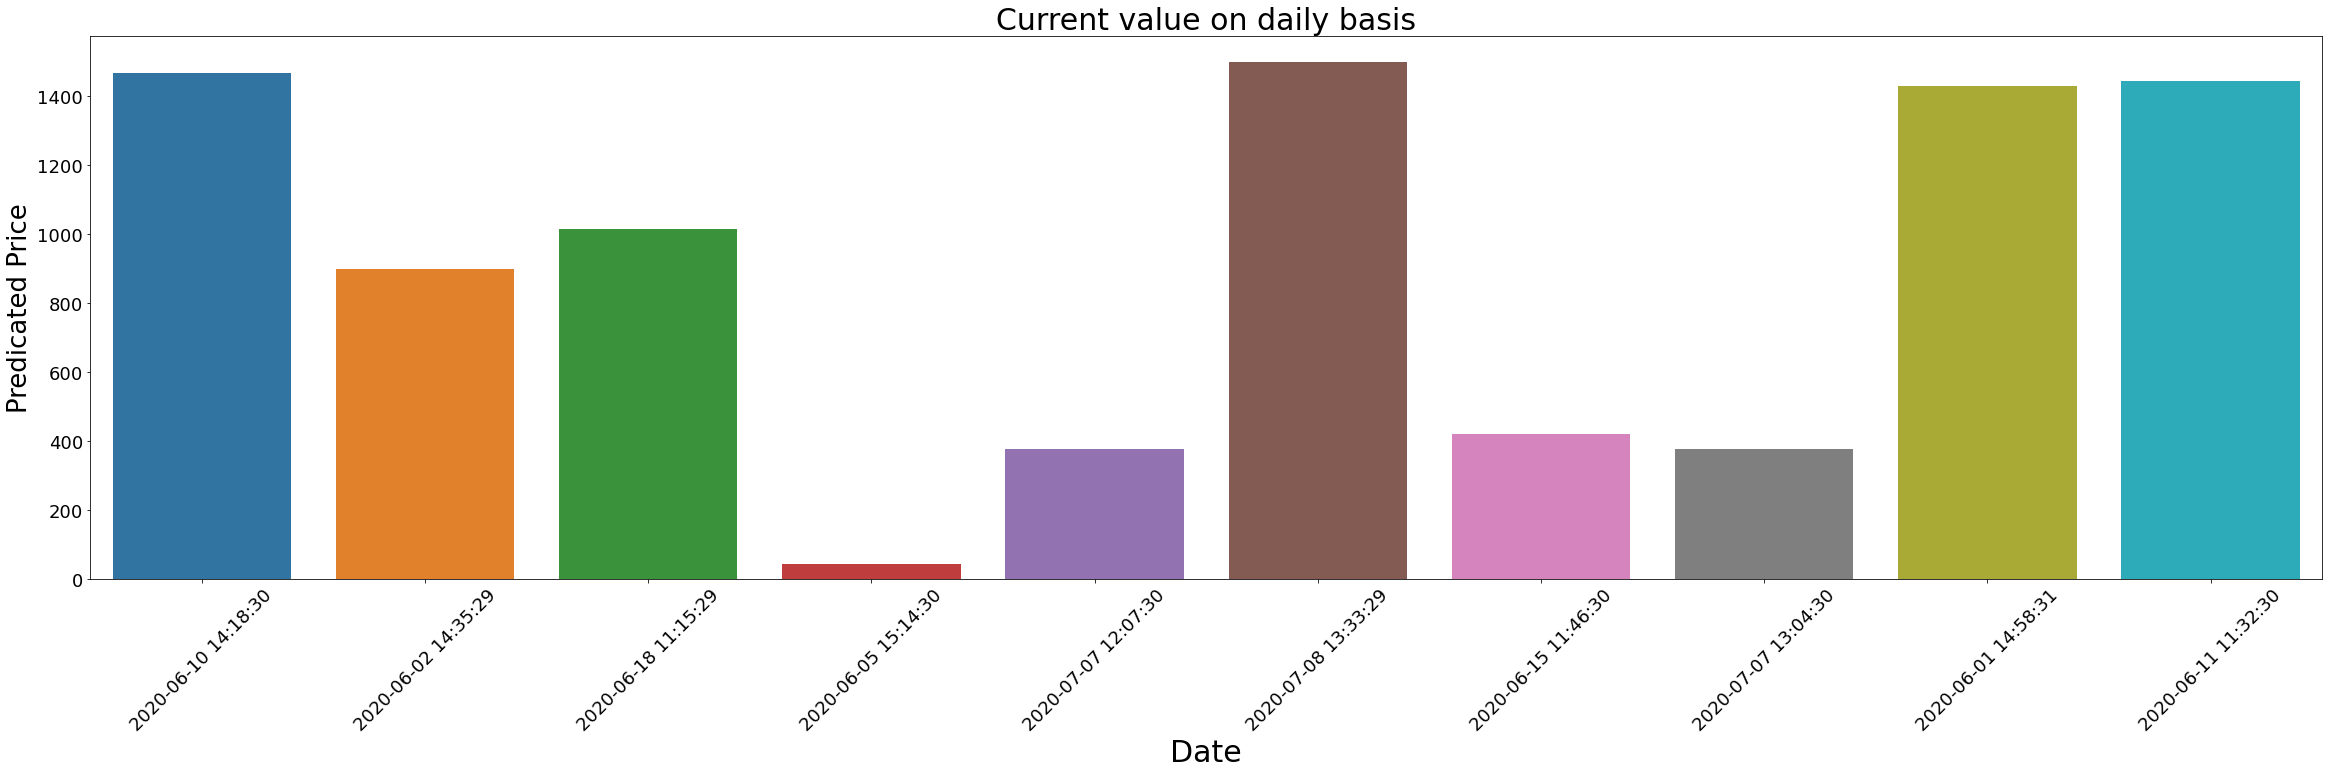

In [27]:
plt.figure(figsize=(40,10))
sns.barplot(df["date"].head(10),df["predictedPrice (N)"])
plt.xticks(rotation=45)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Predicated Price",fontsize = 26)
plt.title("Current value on daily basis",fontsize=30)
plt.tick_params(labelsize=18)

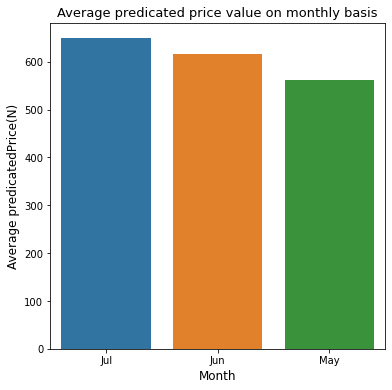

In [36]:
import calendar
df["month"] = pd.DatetimeIndex(df["date"]).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df_mon = df.groupby(["month"]).mean()
df_mon = df_mon.reset_index()
plt.figure(figsize = (6,6))
sns.barplot(df_mon["month"],df_mon["predictedPrice (N)"])
plt.xlabel("Month",fontsize=12)
plt.ylabel("Average predicatedPrice(N)",fontsize = 12)
plt.title("Average predicated price value on monthly basis",fontsize=13)
plt.tick_params(labelsize=10)

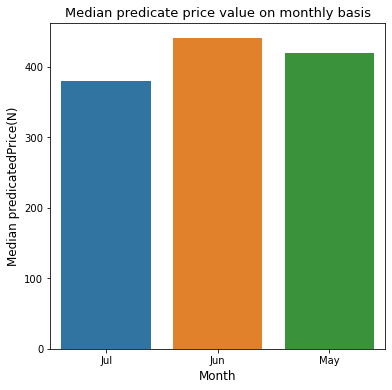

In [37]:
df_mon = df.groupby(["month"]).median()
df_mon = df_mon.reset_index()
plt.figure(figsize = (6,6))
sns.barplot(df_mon["month"],df_mon["predictedPrice (N)"])
plt.xlabel("Month",fontsize=12)
plt.ylabel("Median predicatedPrice(N)",fontsize = 12)
plt.title("Median predicate price value on monthly basis",fontsize= 13)
plt.tick_params(labelsize=10)

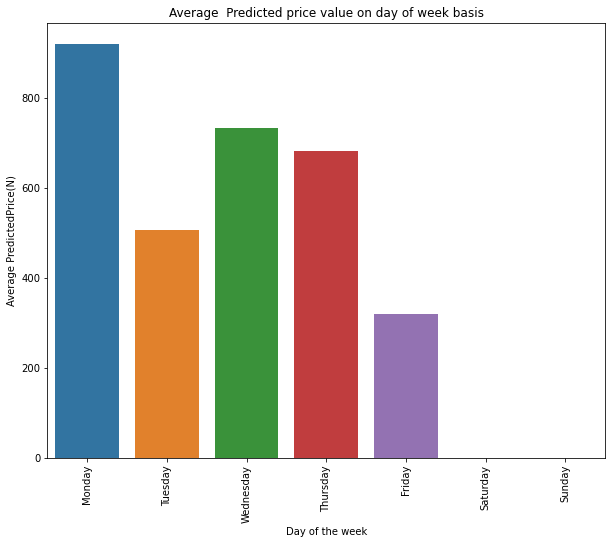

In [38]:
df_week = df.groupby(["dayofweek"]).mean()
df_week = df_week.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(df_week["dayofweek"],df_week["predictedPrice (N)"])
plt.xticks(rotation=90)
plt.xlabel("Day of the week",fontsize=10)
plt.ylabel("Average PredictedPrice(N)",fontsize =10)
plt.title("Average  Predicted price value on day of week basis",fontsize= 12)
plt.tick_params(labelsize=10)

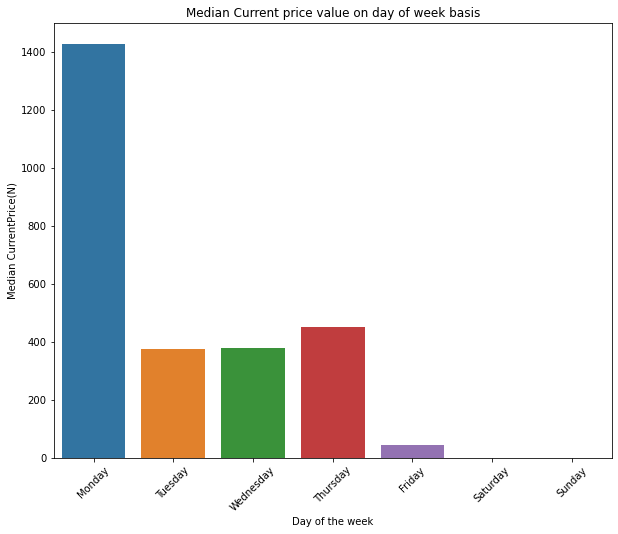

In [39]:
df_week = df.groupby(["dayofweek"]).median()
df_week = df_week.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(df_week["dayofweek"],df_week["currentPrice (N)"])
plt.xticks(rotation=45)
plt.xlabel("Day of the week",fontsize=10)
plt.ylabel("Median CurrentPrice(N)",fontsize =10)
plt.title("Median Current price value on day of week basis",fontsize= 12)
plt.tick_params(labelsize=10)

### Get the prediction in daily base for  month May, June, July

In [40]:
df_may = df[df["month"]=="May"]
df_june = df[df["month"]=="Jun"]
df_july = df[df["month"]=="Jul"]

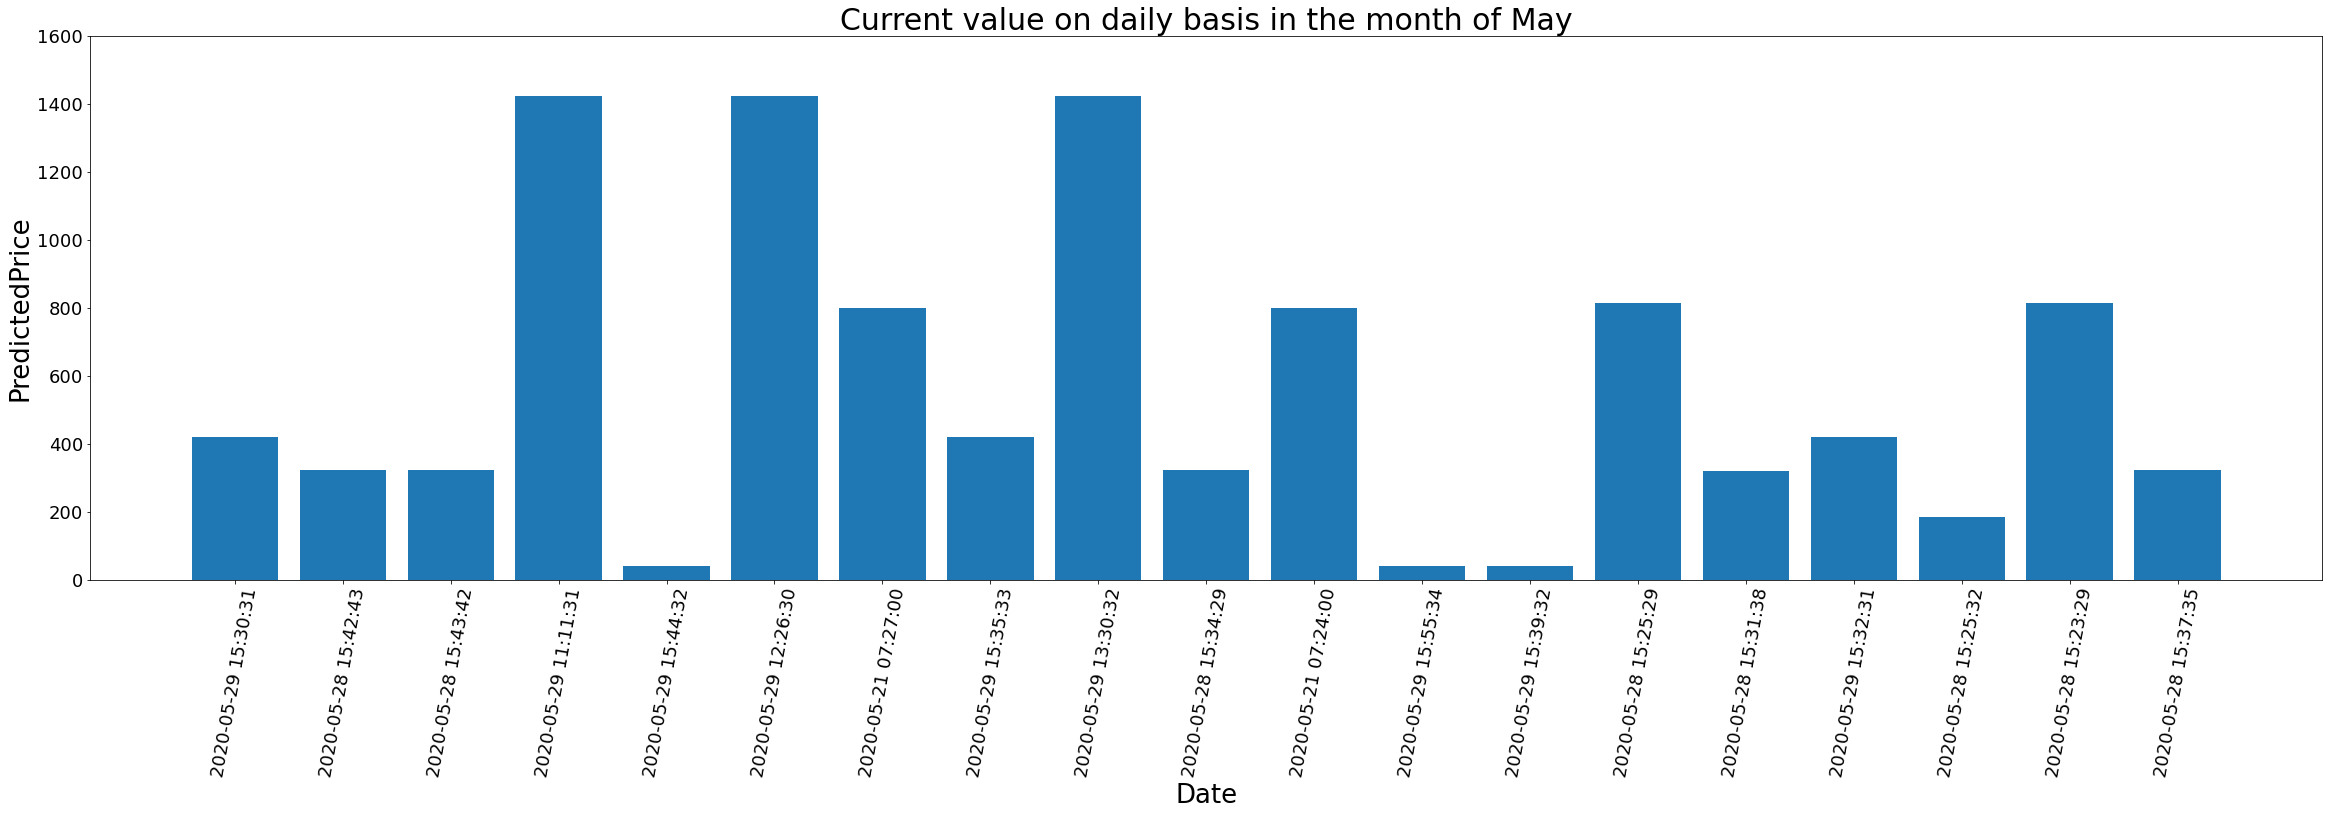

In [67]:
plt.figure(figsize=(40,10))
plt.bar(df_may["date"],df_may["predictedPrice (N)"])
plt.ylim(0,1600)
plt.xticks(rotation=80)
plt.ylabel("PredictedPrice",fontsize=26)
plt.xlabel("Date",fontsize = 26)
plt.title("Current value on daily basis in the month of May",fontsize=30)
plt.tick_params(labelsize=18)

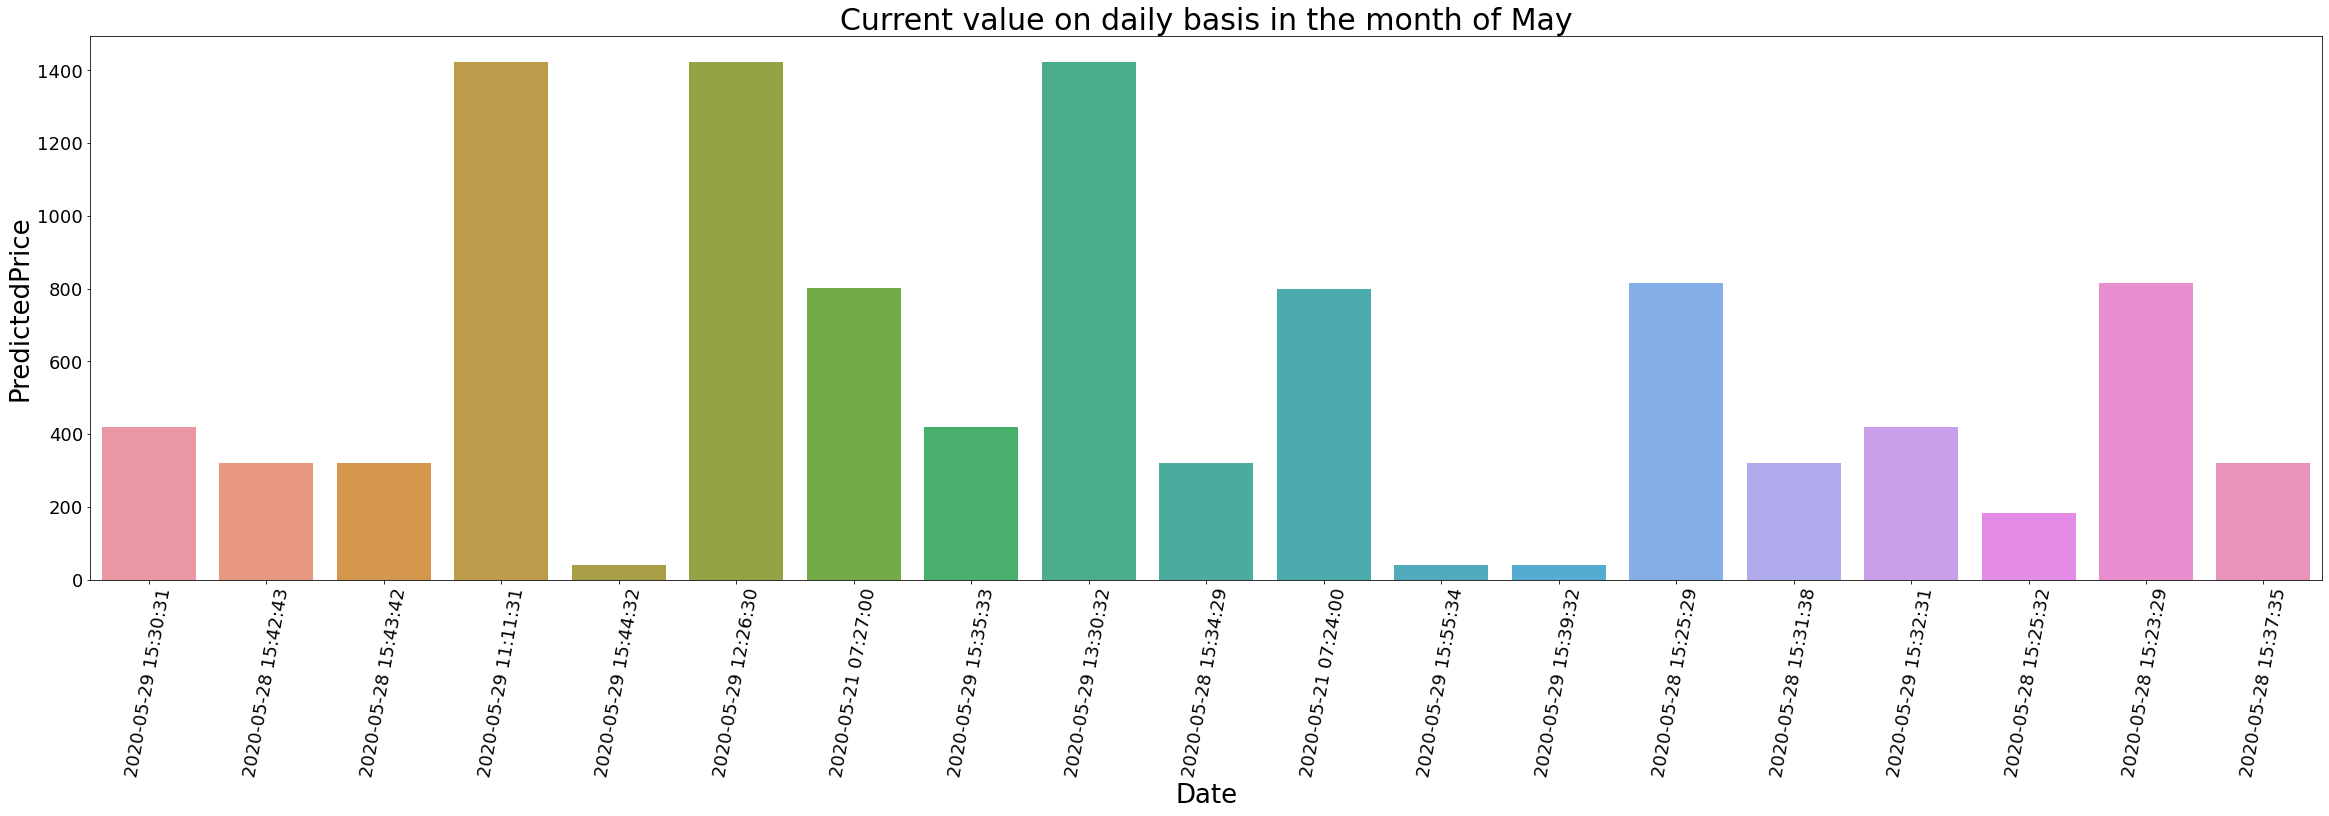

In [65]:
plt.figure(figsize=(40,10))
sns.barplot(df_may["date"],df_may["predictedPrice (N)"])
plt.xticks(rotation=80)
plt.ylabel("PredictedPrice",fontsize=26)
plt.xlabel("Date",fontsize = 26)
plt.title("Current value on daily basis in the month of May",fontsize=30)
plt.tick_params(labelsize=18)

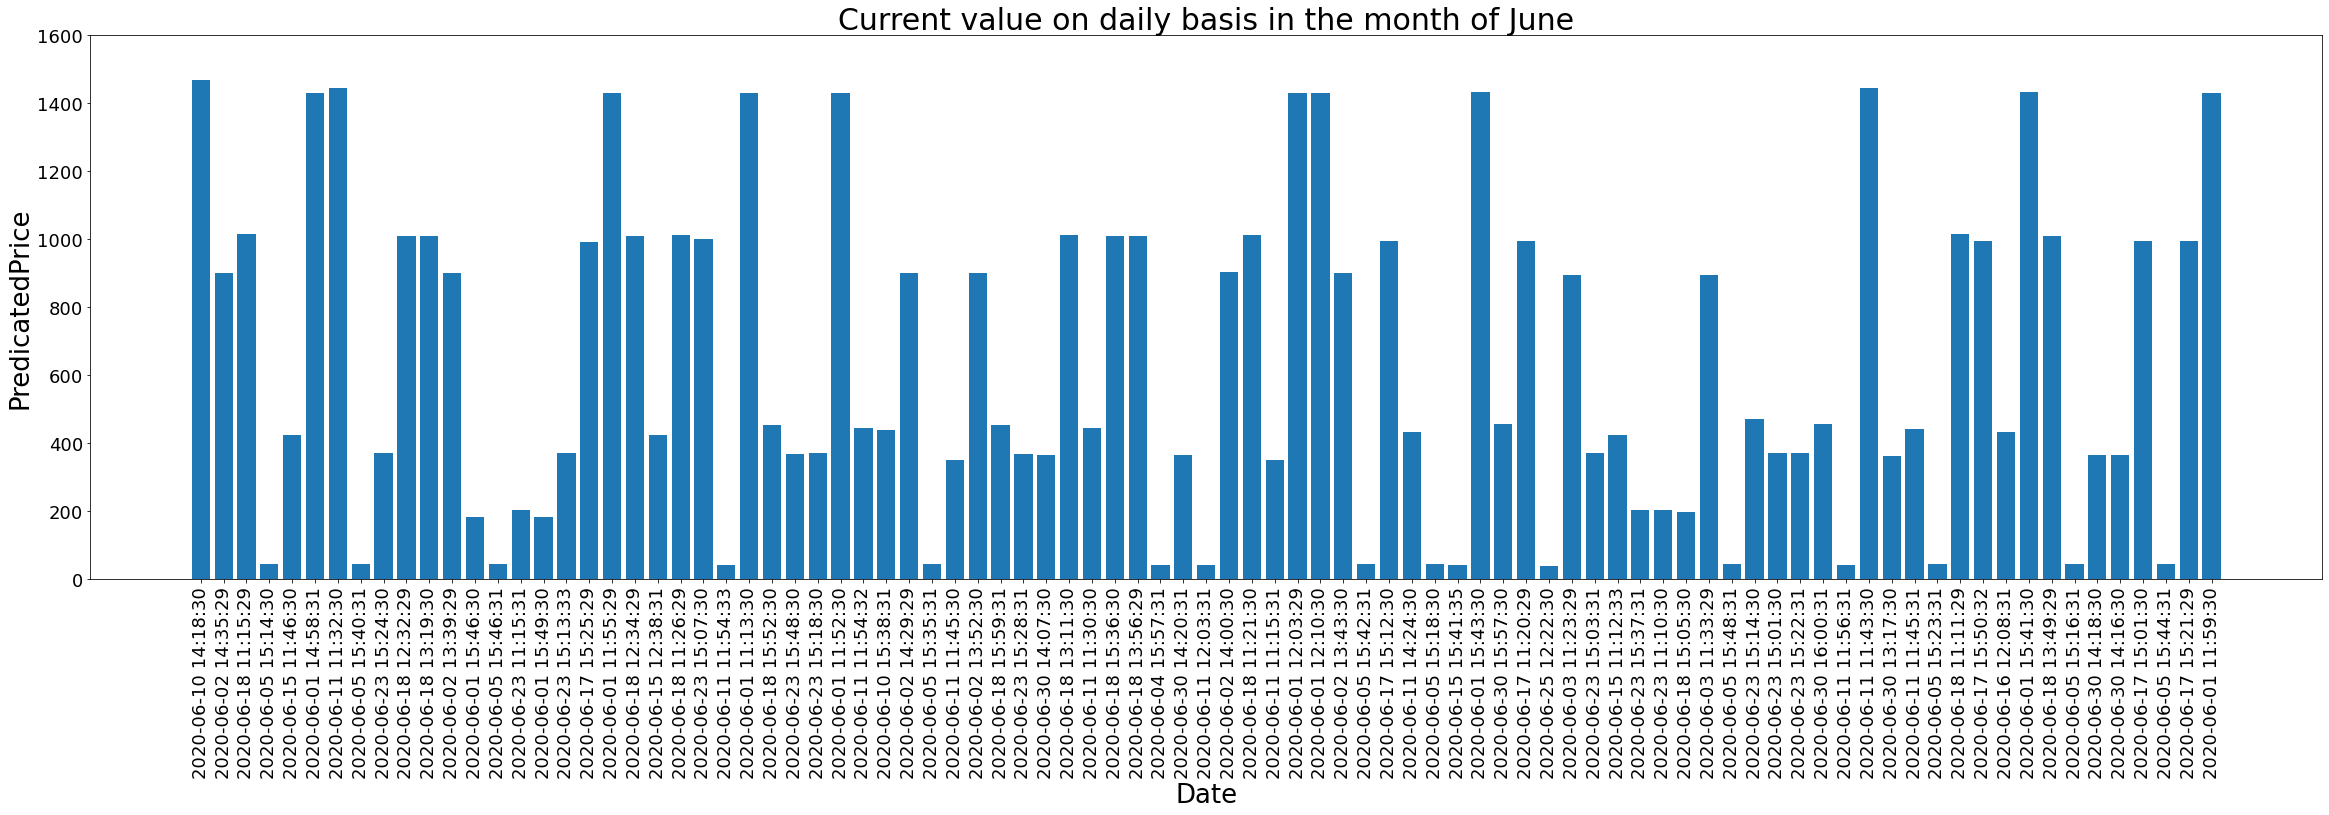

In [68]:
plt.figure(figsize=(40,10))
plt.bar(df_june["date"],df_june["predictedPrice (N)"])
plt.ylim(0,1600)
plt.xticks(rotation=90)
plt.ylabel("PredicatedPrice",fontsize=26)
plt.xlabel("Date",fontsize = 26)
plt.title("Current value on daily basis in the month of June",fontsize=30)
plt.tick_params(labelsize=18)

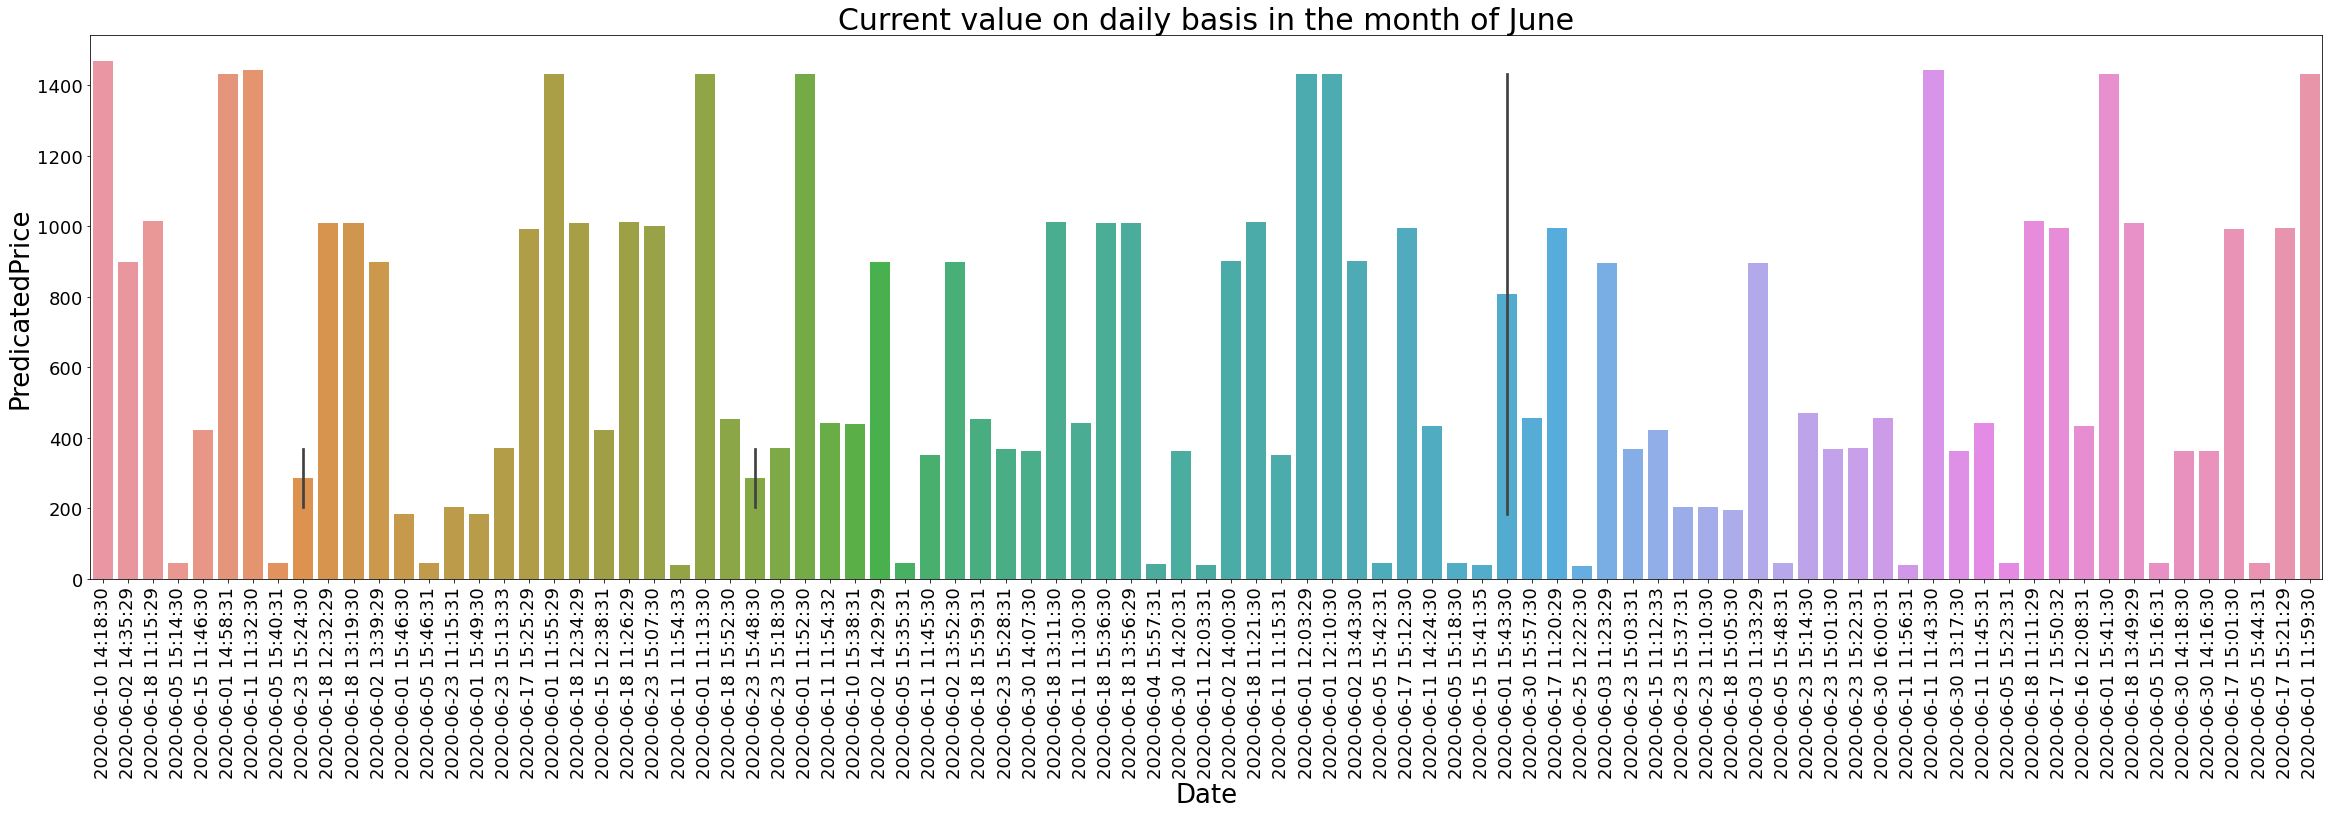

In [42]:
plt.figure(figsize=(40,10))
sns.barplot(df_june["date"],df_june["predictedPrice (N)"])
plt.xticks(rotation=90)
plt.ylabel("PredicatedPrice",fontsize=26)
plt.xlabel("Date",fontsize = 26)
plt.title("Current value on daily basis in the month of June",fontsize=30)
plt.tick_params(labelsize=18)

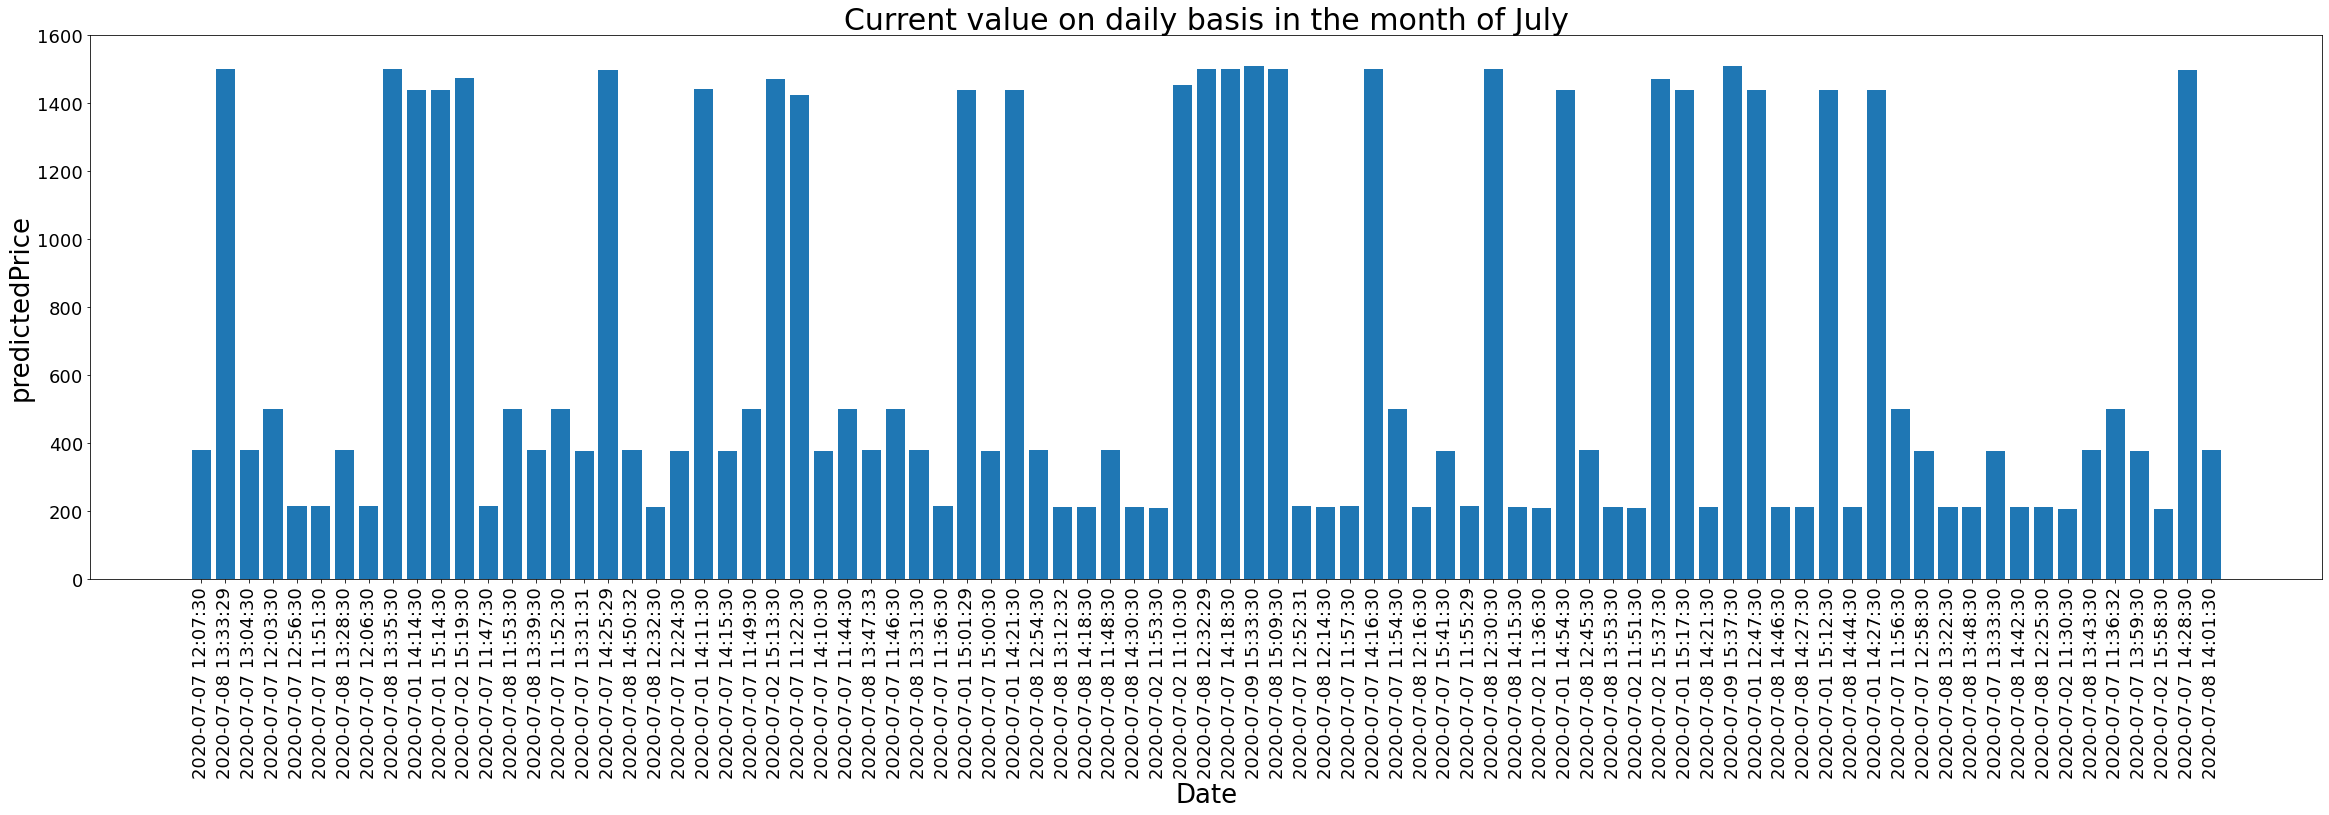

In [69]:
plt.figure(figsize=(40,10))
plt.bar(df_july["date"],df_july["predictedPrice (N)"])
plt.ylim(0,1600)
plt.xticks(rotation=90)
plt.ylabel("predictedPrice",fontsize=26)
plt.xlabel("Date",fontsize = 26)
plt.title("Current value on daily basis in the month of July",fontsize=30)
plt.tick_params(labelsize=18)

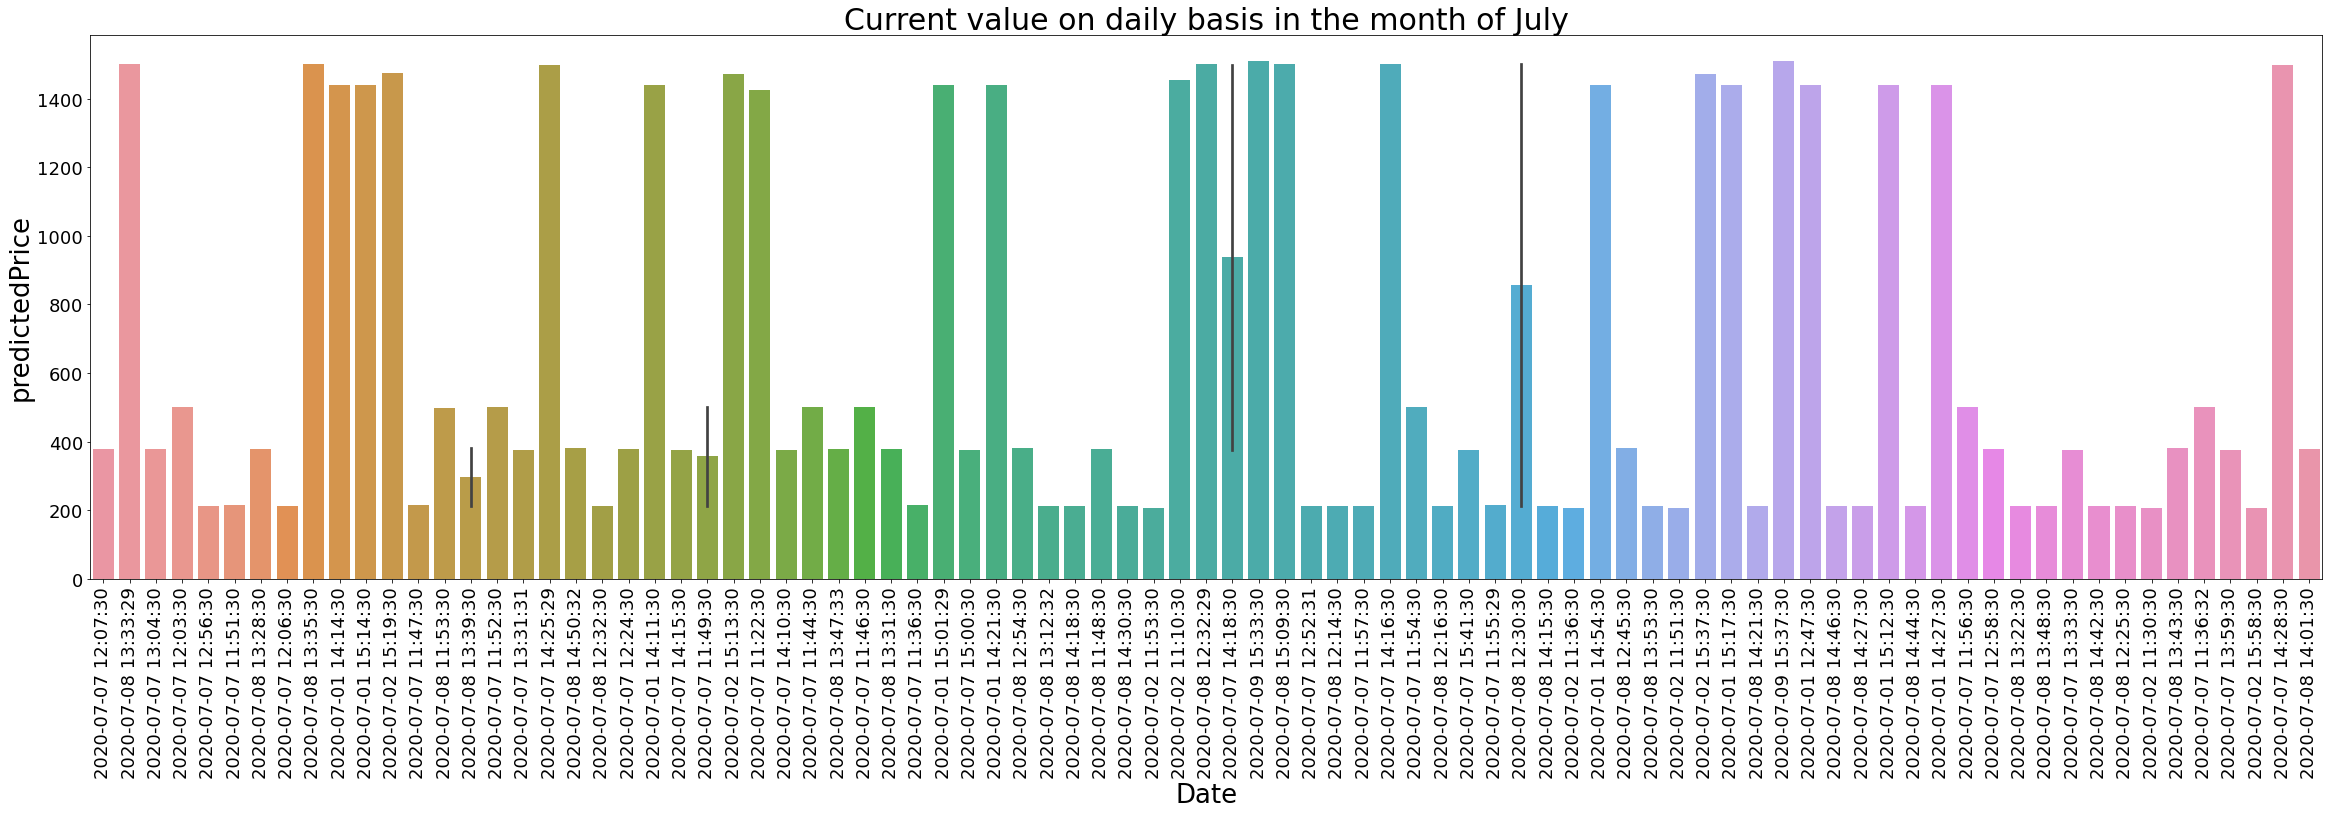

In [43]:
plt.figure(figsize=(40,10))
sns.barplot(df_july["date"],df_july["predictedPrice (N)"])
plt.xticks(rotation=90)
plt.ylabel("predictedPrice",fontsize=26)
plt.xlabel("Date",fontsize = 26)
plt.title("Current value on daily basis in the month of July",fontsize=30)
plt.tick_params(labelsize=18)

In [70]:
# I make a new file in the form of csv that store all recode 
df.to_csv("New_prediction.csv", index = False)

# Your task has been completed 